In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all" 
# Permite mostrar el resultado de cada linea de la misma celda

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import keras

from matplotlib import colors
from pylab import bone, pcolor, colorbar, plot, show
 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from minisom import MiniSom


import pickle
from multiprocessing import cpu_count, Process, Queue

import matplotlib.patches as mptchs
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

from sklearn import datasets
from sklearn.preprocessing import scale

## Ejemplo de implementacion

https://github.com/JustGlowing/minisom  

Provee ejemplos sobre minisom

MiniSom(x, y, input_len, sigma=1.0, learning_rate=0.5, decay_function=learning_rate / (1+t/(max_iterarations/2)), neighborhood_function='gaussian', topology='rectangular', activation_distance='euclidean', random_seed=None)

In [4]:
help(MiniSom)      #documentacion sobre minisom

Help on class MiniSom in module minisom:

class MiniSom(builtins.object)
 |  MiniSom(x, y, input_len, sigma=1.0, learning_rate=0.5, decay_function=<function asymptotic_decay at 0x0000021E31812438>, neighborhood_function='gaussian', topology='rectangular', activation_distance='euclidean', random_seed=None)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, x, y, input_len, sigma=1.0, learning_rate=0.5, decay_function=<function asymptotic_decay at 0x0000021E31812438>, neighborhood_function='gaussian', topology='rectangular', activation_distance='euclidean', random_seed=None)
 |      Initializes a Self Organizing Maps.
 |      
 |      A rule of thumb to set the size of the grid for a dimensionality
 |      reduction task is that it should contain 5*sqrt(N) neurons
 |      where N is the number of samples in the dataset to analyze.
 |      
 |      E.g. if your dataset has 150 samples, 5*sqrt(150) = 61.23
 |      hence a map 8-by-8 should perform well.
 |      
 |      Parameters
 |  

Training...
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.23133616838629753

...ready!


<Figure size 504x504 with 0 Axes>

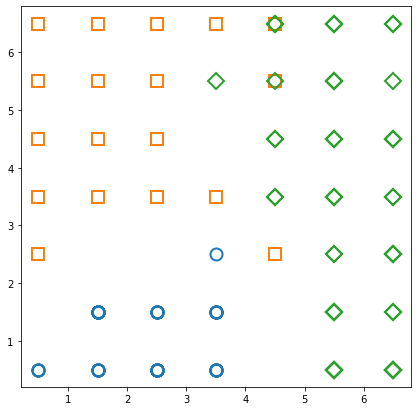

In [5]:
data = np.genfromtxt('iris.csv', delimiter=',', usecols=(0, 1, 2, 3))

# data normalization
data = data - np.mean(data, axis=0)

# Initialization and training
som = MiniSom(7, 7, 4, sigma=3., learning_rate=.7, activation_distance='euclidean', topology='rectangular',
              neighborhood_function='triangle', random_seed=10)

print("Training...")
som.train_batch(data, 1000, verbose=True)  # random training
print("\n...ready!")

plt.figure(figsize=(7, 7))

target = np.genfromtxt('iris.csv', delimiter=',', usecols=(4), dtype=str)
t = np.zeros(len(target), dtype=int)
t[target == 'setosa'] = 0
t[target == 'versicolor'] = 1
t[target == 'virginica'] = 2

# use different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    _=plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)
#plt.axis([0, 7, 0, 7])
_=plt.show()

In [6]:
#ejemplo 2

# load the digits dataset from scikit-learn
digits = datasets.load_digits(n_class=10)
data = digits.data  # matrix where each row is a vector that represent a digit.
data = scale(data)
num = digits.target  # num[i] is the digit represented by data[i]

som = MiniSom(30, 30, 64, sigma=4, learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(data)
print("Training...")
som.train_random(data, 5000, verbose=False)  # random training
print("\n...ready!")

Training...

...ready!


<Figure size 576x576 with 0 Axes>

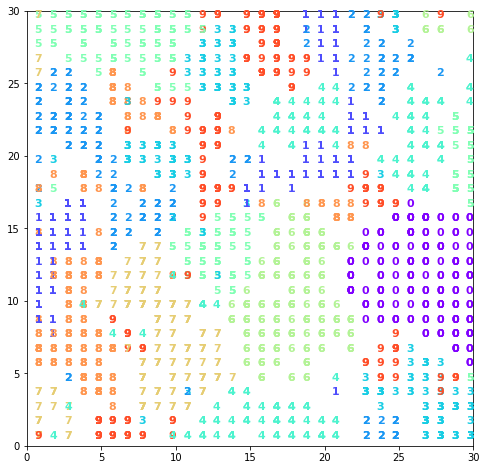

In [7]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, num):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    _=plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
_=plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
_=plt.show()

<Figure size 720x720 with 0 Axes>

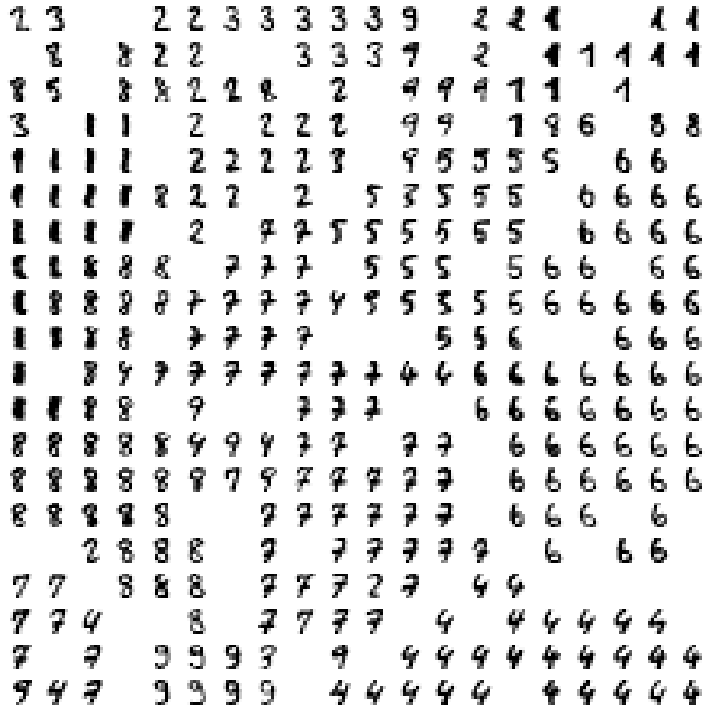

In [8]:
plt.figure(figsize=(10, 10), facecolor='white')
cnt = 0
for j in reversed(range(20)):  # images mosaic
    for i in range(20):
        _=plt.subplot(20, 20, cnt+1, frameon=False,  xticks=[],  yticks=[])
        if (i, j) in wmap:
            _=plt.imshow(digits.images[wmap[(i, j)]],
                       cmap='Greys', interpolation='nearest')
        else:
            _=plt.imshow(np.zeros((8, 8)),  cmap='Greys')
        cnt = cnt + 1

_=plt.tight_layout()
_=plt.show()

In [ ]:
#Ejemplo 3

In [9]:
dataset=pd.read_csv("Credit_Card_Applications.csv")
dataset.head()
dataset.shape
dataset.Class.value_counts()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


(690, 16)

0    383
1    307
Name: Class, dtype: int64

In [10]:
#valores sin etiqueta

X = dataset.drop('Class', axis=1).values
y = dataset['Class'].values 

In [11]:
#Vamos a escalar nuestros valores de X entre 0 y 1

sc=MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(X)

In [12]:
som = MiniSom(x=10, y=10, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)

In [13]:
som.random_weights_init(X)
som.train_random(data=X, num_iteration = 150)

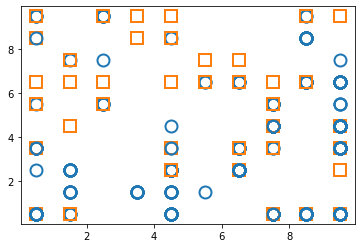

In [14]:
markers = ['o', 's']
colors = ['C0', 'C1']
for cnt, xx in enumerate(X):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    _=plt.plot(w[0]+.5, w[1]+.5, markers[y[cnt]], markerfacecolor='None',
             markeredgecolor=colors[y[cnt]], markersize=12, markeredgewidth=2)
#plt.axis([0, 7, 0, 7])
#plt.savefig('resulting_images/som_iris.png')
_=plt.show()